Questions, insights, and comments on the bottom


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Reading the datasets
consumer_panel_data = pd.read_csv('./AssessmentDataMain.csv')
population_data = pd.read_csv('./AssessmentData_PopulationSize_Apx.csv')


In [ ]:
population_data.head()

,City,Population
0,TOTAL US,318924513
1,NEW YORK NY,8405837
2,CHICAGO IL,1955130
3,LOS ANGELES CA,1595037
4,MIAMI FL,1339155


In [ ]:
consumer_panel_data

,Week Starting,Company,State,City,Users,Transactions,Dollars,ASP
0,12/30/2013,Pink Cab,GA,ATLANTA GA,72,114,1236.00,10.842105
1,12/30/2013,Pink Cab,TX,AUSTIN TX,12,21,240.00,11.428571
2,12/30/2013,Pink Cab,MA,BOSTON MA,165,345,4308.00,12.486957
3,12/30/2013,Pink Cab,IL,CHICAGO IL,390,654,10197.00,15.591743
4,12/30/2013,Pink Cab,TX,DALLAS TX,42,90,831.00,9.233333
...,...,...,...,...,...,...,...,...
2215,12/29/2014,Yellow Cab,WA,SEATTLE WA,367,761,11582.94,15.220683
2216,12/29/2014,Yellow Cab,CA,SILICON VALLEY,384,766,15215.11,19.863068
2217,12/29/2014,Yellow Cab,Total US,Total US,39179,85284,1443351.56,16.924060
2218,12/29/2014,Yellow Cab,AZ,TUCSON AZ,99,186,3197.63,17.191559


Cleaning Data to Merge

In [ ]:
population_data['City'] = population_data['City'].str.upper().str.strip()
consumer_panel_data['City'] = consumer_panel_data['City'].str.upper().str.strip()


Merging Data

In [ ]:
merged_df = consumer_panel_data.merge(population_data, on='City', how='left')

Calculating per capita metrics

In [ ]:
#per capita metrics calculations
merged_df['Dollars/Capita'] = merged_df['Dollars']/merged_df['Population']
merged_df['Transaction/Capita'] = merged_df['Transactions']/merged_df['Population']
merged_df['Users/Capita'] = merged_df['Users']/merged_df['Population']




In [ ]:
merged_df.head()

,Week Starting,Company,State,City,Users,Transactions,Dollars,ASP,Population,Dollars/Capita,Transaction/Capita,Users/Capita
0,12/30/2013,Pink Cab,GA,ATLANTA GA,72,114,1236.0,10.842105,814885,0.001517,0.000140,0.000088
1,12/30/2013,Pink Cab,TX,AUSTIN TX,12,21,240.0,11.428571,698371,0.000344,0.000030,0.000017
2,12/30/2013,Pink Cab,MA,BOSTON MA,165,345,4308.0,12.486957,248968,0.017303,0.001386,0.000663
3,12/30/2013,Pink Cab,IL,CHICAGO IL,390,654,10197.0,15.591743,1955130,0.005216,0.000335,0.000199
4,12/30/2013,Pink Cab,TX,DALLAS TX,42,90,831.0,9.233333,942908,0.000881,0.000095,0.000045


In [ ]:
#taking a step bakc to group by company
national_trends = merged_df.groupby('Company').agg({
    'Dollars': 'sum',
    'Transactions': 'sum',
    'Users': 'sum',
    'ASP': 'mean'
}).reset_index()


Now that we have seprated how we have grouped by (both company/city pair and company in nation), we can begin analyzing trends


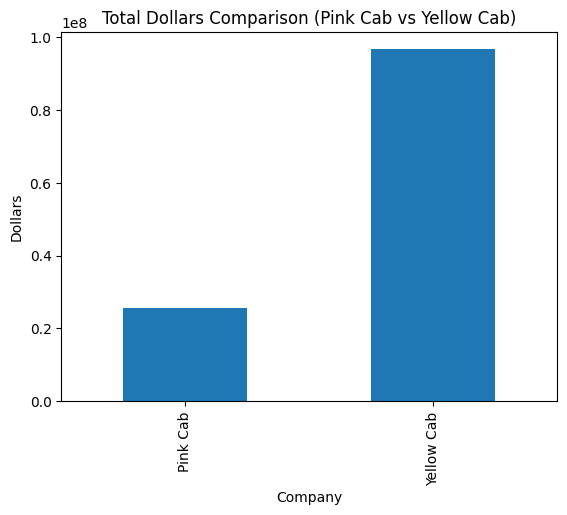

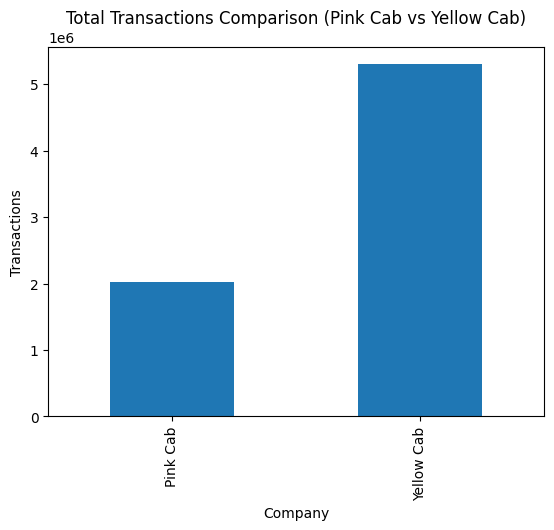

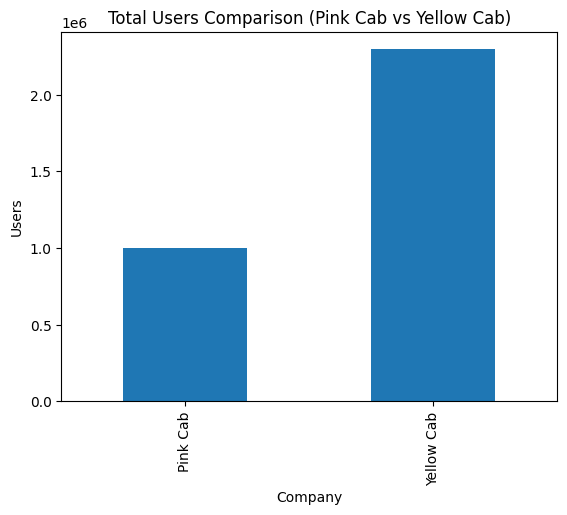

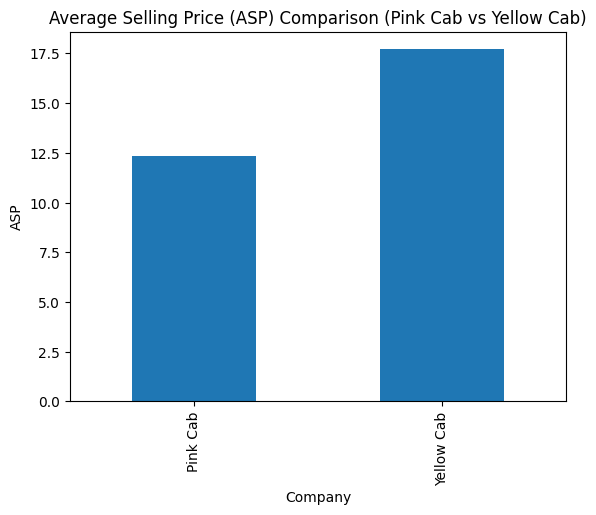

In [ ]:
#starting with national trends
# metrics to plot n titles
metrics = ['Dollars', 'Transactions', 'Users', 'ASP']
titles = [
    'Total Dollars Comparison (Pink Cab vs Yellow Cab)',
    'Total Transactions Comparison (Pink Cab vs Yellow Cab)',
    'Total Users Comparison (Pink Cab vs Yellow Cab)',
    'Average Selling Price (ASP) Comparison (Pink Cab vs Yellow Cab)'
]

# looping
for metric, title in zip(metrics, titles):
    national_trends.plot(
        kind='bar',
        x='Company',
        y=metric,
        legend=False,
        title=title
    )
    plt.ylabel(metric)
    plt.xlabel('Company')
    plt.show()

Insights:
* Seems as though Yellow Cab is consistently out performing Pink Cab globally
* However, pink cab has a relatively comparable ASP...

* Deeper Analysis is Needed, time to look into each city and get granular


In [ ]:
#agg city-level trends, grouping each company in each city
city_trends = merged_df.groupby(['City', 'Company']).agg({
    'Dollars': 'sum',
    'Transactions': 'sum',
    'Users': 'sum',
    'ASP': 'mean'
}).reset_index()


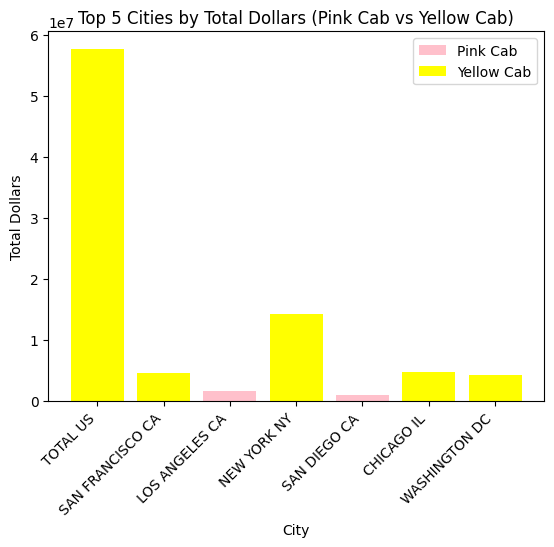

In [ ]:
# top 5 cities by revenue for each company
for company, color in [('Pink Cab', 'pink'), ('Yellow Cab', 'yellow')]:
    top_cities = city_trends[city_trends['Company'] == company].sort_values('Dollars', ascending=False).head(5)
    plt.bar(top_cities['City'], top_cities['Dollars'], label=company, color=color)

plt.title('Top 5 Cities by Total Dollars (Pink Cab vs Yellow Cab)')
plt.ylabel('Total Dollars')
plt.xlabel('City')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


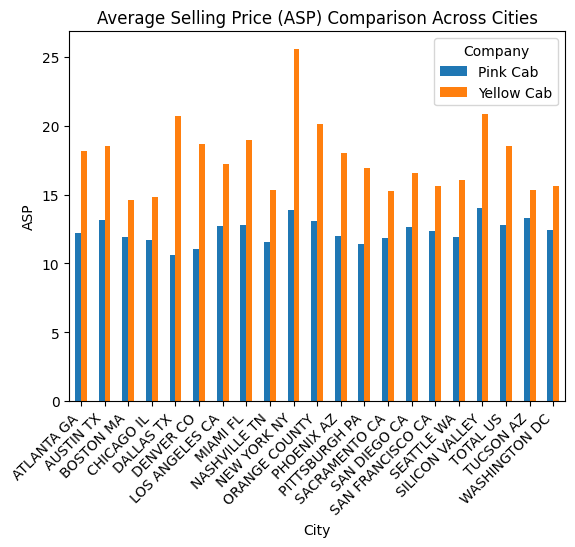

In [ ]:
asp_comparison = city_trends.pivot(index='City', columns='Company', values='ASP').dropna()

asp_comparison.plot(kind='bar')
plt.title('Average Selling Price (ASP) Comparison Across Cities')
plt.ylabel('ASP')
plt.xlabel('City')
plt.xticks(rotation=45, ha='right')
plt.show()

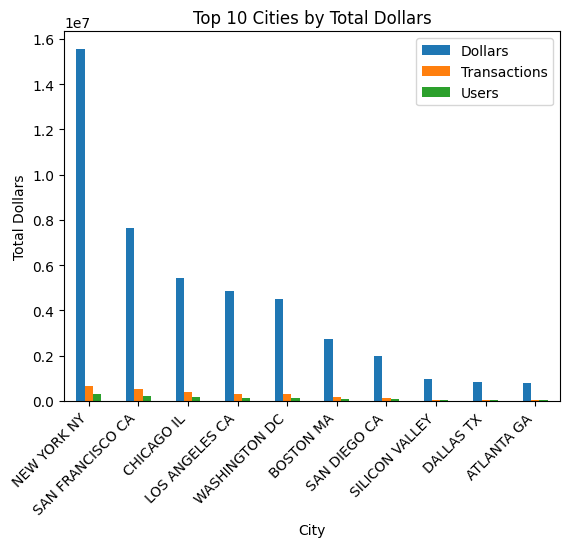

In [ ]:
#city-level trends across companies
city_summary = city_trends.groupby('City').agg({
    'Dollars': 'sum',
    'Transactions': 'sum',
    'Users': 'sum'
}).sort_values('Dollars', ascending=False)

#top 10 cities by total dollars
city_summary_fil = city_summary.drop(index='TOTAL US', errors='ignore')
city_summary_fil.head(10).plot(kind='bar')

plt.title('Top 10 Cities by Total Dollars')
plt.ylabel('Total Dollars')
plt.xlabel('City')
plt.xticks(rotation=45, ha='right')
plt.show()


# Conclusions:

* **What trends and conclusions can you draw about the cab market and Pink Cab/Yellow Cab? How might you use these insights to inform an investment opinion about the two companies? (Most important) (40-50 minutes)**

Yellow Cab Company is the market leader across the board in terms of most users, transactions, and thus revenue...

*However*, Pink Cab Company is able to compete by deploying premium pricing (as evident in the higher than expected ASP in certain areas.)

This indicates that Pink Cab Company probably goes for a luxury/premium market where they can target their niche.

Both companies do well in high population cities, but Yellow Cab has an advantage. Lower populations slightly level the playing field.

I would invest long term in Yellow cab due to its stability, dependent on how they grow. Pink Cab would be niche and present possibility for higher growth dependent on their strategies to combat competition.


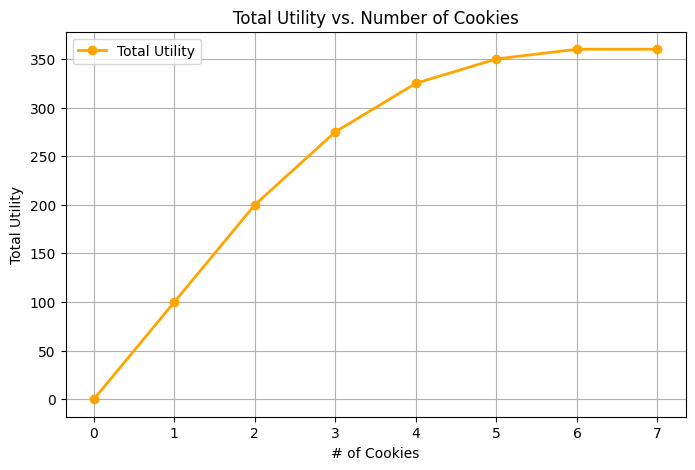

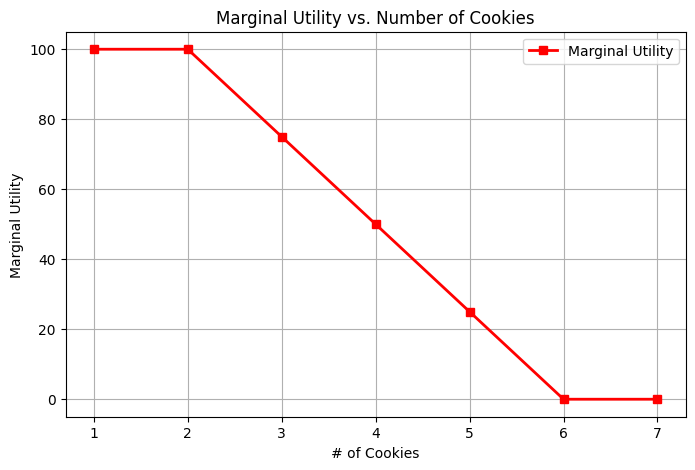

In [ ]:
import matplotlib.pyplot as plt

# Data
cookies = [0, 1, 2, 3, 4, 5, 6, 7]
total_utility = [0, 100, 200, 275, 325, 350, 360, 360]
marginal_utility = [None, 100, 100, 75, 50, 25, 0, 0]

# Plot Total Utility
plt.figure(figsize=(8, 5))
plt.plot(cookies, total_utility, marker='o', linestyle='-', label="Total Utility", linewidth=2, color='orange')
plt.xlabel("# of Cookies")
plt.ylabel("Total Utility")
plt.title("Total Utility vs. Number of Cookies")
plt.grid(True)
plt.legend()
plt.show()

# Plot Marginal Utility
plt.figure(figsize=(8, 5))
plt.plot(cookies[1:], marginal_utility[1:], marker='s', linestyle='-', label="Marginal Utility", linewidth=2, color='red')
plt.xlabel("# of Cookies")
plt.ylabel("Marginal Utility")
plt.title("Marginal Utility vs. Number of Cookies")
plt.grid(True)
plt.legend()
plt.show()


* What biases could be in the data? (10 Minutes)

There are handfuls of biases that are possible to be present. Depends how the data was collected from, where it was collected from, if duplicate users were considered, etc. Dependent on those factors we may see more data from users in certain areas who use certain methods of payment. thus it is hard to account for other variables unless data source is defined.


* Could you correct for any of them currently? If not, what other data would you need? Note: you do not need to actually correct for any of the biases, if you find any. Just lay out how you would (10 Minutes)


I would clean data, I would like more data about capita and the metrics and see where the data is being sourced from

Cigars Utility Table:
   Cigars (No. per Month)  Total Utility (TU)  Marginal Utility (MU)  MU per $
0                       1                  28                     28      4.67
1                       2                  46                     18      3.00
2                       3                  62                     16      2.66
3                       4                  74                     12      2.00
4                       5                  80                      6      1.00
5                       6                  84                      4      0.67
6                       7                  86                      2      0.33

Brandy Utility Table:
   Brandy (Bottles per Month)  Total Utility (TU)  Marginal Utility (MU)  \
0                           1                 150                    150   
1                           2                 270                    120   
2                           3                 360                     90   
3                  

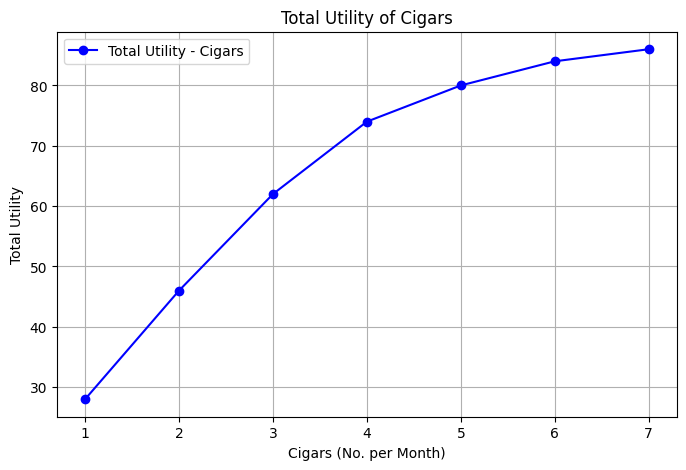

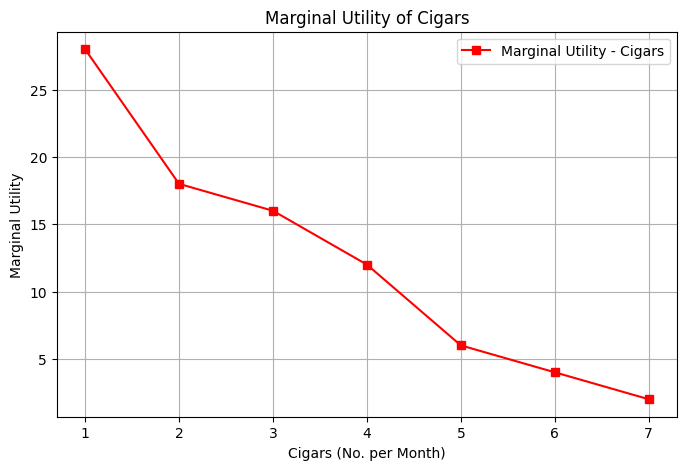

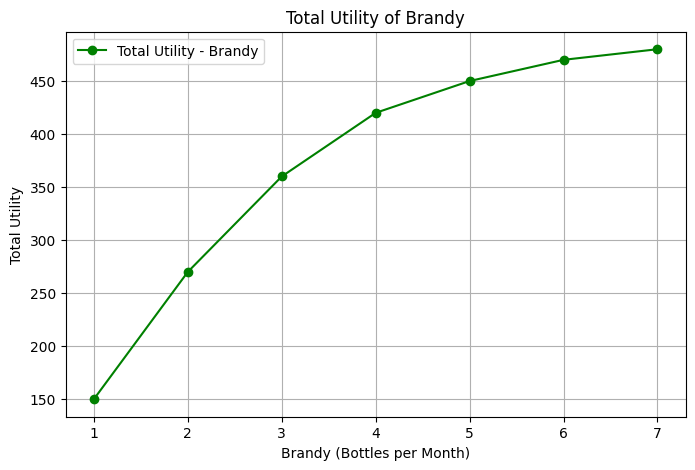

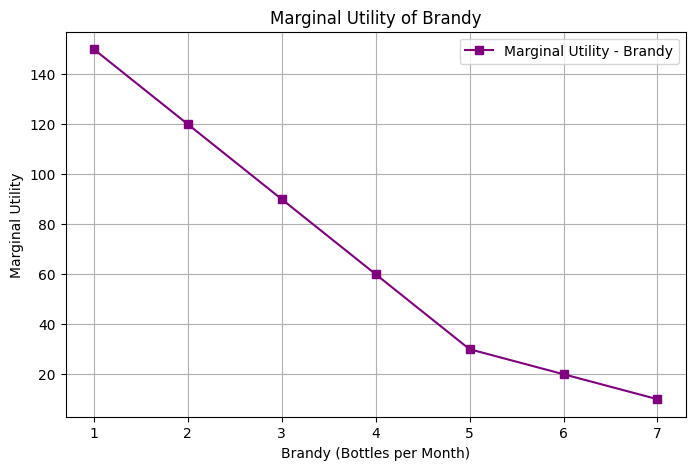

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for Cigars
data_cigars = {
    "Cigars (No. per Month)": [1, 2, 3, 4, 5, 6, 7],
    "Total Utility (TU)": [28, 46, 62, 74, 80, 84, 86],
    "Marginal Utility (MU)": [28, 18, 16, 12, 6, 4, 2],
    "MU per $": [4.67, 3.00, 2.66, 2.00, 1.00, 0.67, 0.33]
}

# Data for Brandy
data_brandy = {
    "Brandy (Bottles per Month)": [1, 2, 3, 4, 5, 6, 7],
    "Total Utility (TU)": [150, 270, 360, 420, 450, 470, 480],
    "Marginal Utility (MU)": [150, 120, 90, 60, 30, 20, 10],
    "MU per $": [5.00, 4.00, 3.00, 2.00, 1.00, 0.67, 0.33]
}

# Creating DataFrames
df_cigars = pd.DataFrame(data_cigars)
df_brandy = pd.DataFrame(data_brandy)

# Displaying the DataFrames
print("Cigars Utility Table:")
print(df_cigars)
print("\nBrandy Utility Table:")
print(df_brandy)

# Plot Total Utility for Cigars
plt.figure(figsize=(8, 5))
plt.plot(df_cigars["Cigars (No. per Month)"], df_cigars["Total Utility (TU)"], marker='o', linestyle='-', color='blue', label="Total Utility - Cigars")
plt.xlabel("Cigars (No. per Month)")
plt.ylabel("Total Utility")
plt.title("Total Utility of Cigars")
plt.grid(True)
plt.legend()
plt.show()

# Plot Marginal Utility for Cigars
plt.figure(figsize=(8, 5))
plt.plot(df_cigars["Cigars (No. per Month)"], df_cigars["Marginal Utility (MU)"], marker='s', linestyle='-', color='red', label="Marginal Utility - Cigars")
plt.xlabel("Cigars (No. per Month)")
plt.ylabel("Marginal Utility")
plt.title("Marginal Utility of Cigars")
plt.grid(True)
plt.legend()
plt.show()

# Plot Total Utility for Brandy
plt.figure(figsize=(8, 5))
plt.plot(df_brandy["Brandy (Bottles per Month)"], df_brandy["Total Utility (TU)"], marker='o', linestyle='-', color='green', label="Total Utility - Brandy")
plt.xlabel("Brandy (Bottles per Month)")
plt.ylabel("Total Utility")
plt.title("Total Utility of Brandy")
plt.grid(True)
plt.legend()
plt.show()

# Plot Marginal Utility for Brandy
plt.figure(figsize=(8, 5))
plt.plot(df_brandy["Brandy (Bottles per Month)"], df_brandy["Marginal Utility (MU)"], marker='s', linestyle='-', color='purple', label="Marginal Utility - Brandy")
plt.xlabel("Brandy (Bottles per Month)")
plt.ylabel("Marginal Utility")
plt.title("Marginal Utility of Brandy")
plt.grid(True)
plt.legend()
plt.show()


Updated Cigars Utility Table:
   Cigars (No. per Month)  Total Utility (TU)  Marginal Utility (MU)  MU per $
0                       1                  28                     28      3.50
1                       2                  46                     18      2.25
2                       3                  62                     16      2.00
3                       4                  74                     12      1.50
4                       5                  80                      6      0.75
5                       6                  84                      4      0.50
6                       7                  86                      2      0.25


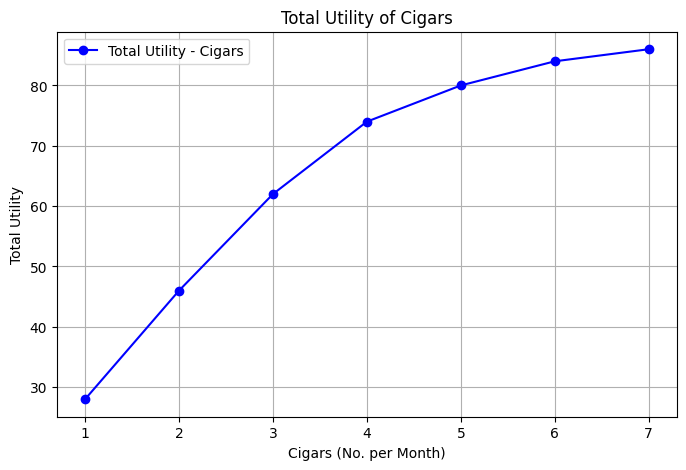

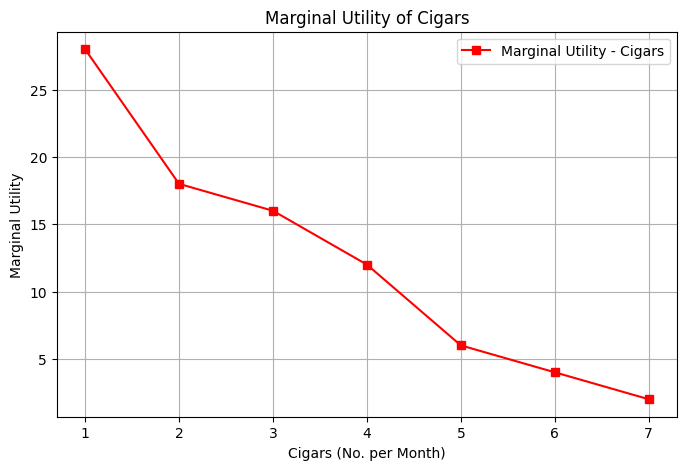

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Updated data for Cigars with new MU per $
data_cigars_updated = {
    "Cigars (No. per Month)": [1, 2, 3, 4, 5, 6, 7],
    "Total Utility (TU)": [28, 46, 62, 74, 80, 84, 86],
    "Marginal Utility (MU)": [28, 18, 16, 12, 6, 4, 2],
    "MU per $": [3.50, 2.25, 2.00, 1.50, 0.75, 0.50, 0.25]
}

# Creating DataFrame
df_cigars_updated = pd.DataFrame(data_cigars_updated)

# Displaying the updated table
print("Updated Cigars Utility Table:")
print(df_cigars_updated)

# Plot Total Utility for Cigars
plt.figure(figsize=(8, 5))
plt.plot(df_cigars_updated["Cigars (No. per Month)"], df_cigars_updated["Total Utility (TU)"],
         marker='o', linestyle='-', color='blue', label="Total Utility - Cigars")
plt.xlabel("Cigars (No. per Month)")
plt.ylabel("Total Utility")
plt.title("Total Utility of Cigars")
plt.grid(True)
plt.legend()
plt.show()

# Plot Marginal Utility for Cigars
plt.figure(figsize=(8, 5))
plt.plot(df_cigars_updated["Cigars (No. per Month)"], df_cigars_updated["Marginal Utility (MU)"],
         marker='s', linestyle='-', color='red', label="Marginal Utility - Cigars")
plt.xlabel("Cigars (No. per Month)")
plt.ylabel("Marginal Utility")
plt.title("Marginal Utility of Cigars")
plt.grid(True)
plt.legend()
plt.show()


* What other datasets would you want to add to enhance your analysis? (5-10 minutes)

As stated before, I would like to see more information about the individuals in each city or about each customer. I.e. Avg age, income levels, population density...

I would also like to see data on things such as what types of cars are being used, how many drivers there are, how many riders, how frequent people use this, where it is most frequently used, what is the operational costs, how that impacts revenue, and what factors come into pricing. I am also curious on who it is marketed to and how.

* Since the consumer panel has other transactions (not just cab expenses), what else could you use the panel for if you wanted to add to this report? (5-10 Minutes)

We could use this data to understand when the cabs are being used, where they are being used, and maybe even why they are being used. Is there a new mall in the area or a bar which causes more responsible usage of ridesharing apps and maybe even discover infrastructural weaknesses i.e. no buses in walkable distance of somewhere.